In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

In [2]:
#資料提取
df=pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
#資料轉型(float->int)
df['Diabetes_012'] = df['Diabetes_012'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


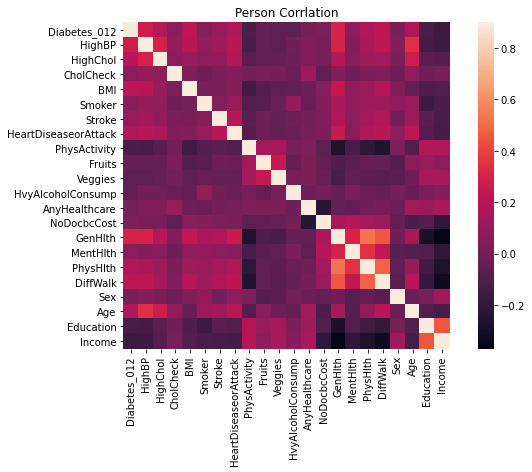

In [5]:
#heatmap correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),vmax=0.9,square=True)
plt.title('Person Corrlation')
plt.show()

In [6]:
#資料分割
X=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


In [7]:
#random forest
rf=RandomForestClassifier(random_state=1,max_features='sqrt',n_jobs=1,verbose=1)
%time rf.fit(X_train,y_train)
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 43.1 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


0.8419793966151582

In [8]:
#預測
y_pred=rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished


In [9]:
#MSE&RMSE檢查
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error:'+str(mse))
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:'+str(rmse))

Mean Squared Error:0.5763034794491748
Root Mean Squared Error:0.7591465467544293


[[62007    51  1934]
 [ 1220     1   137]
 [ 8677     7  2070]]


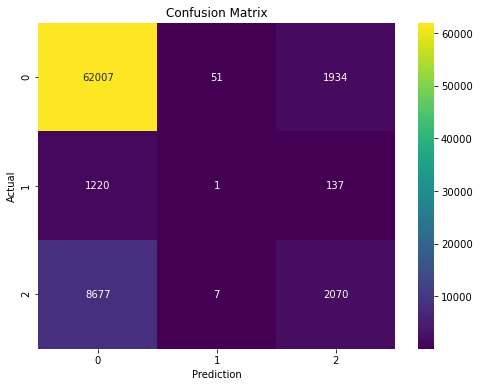

In [10]:
#混淆矩陣
matrix=metrics.confusion_matrix(y_test,y_pred)
print(matrix)

#熱力圖矩陣
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [11]:
#分類結果
report=metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     63992
           1       0.02      0.00      0.00      1358
           2       0.50      0.19      0.28     10754

    accuracy                           0.84     76104
   macro avg       0.46      0.39      0.40     76104
weighted avg       0.80      0.84      0.81     76104



In [12]:
#檢查特徵重要性
feature=pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature)

BMI                     0.181892
Age                     0.122678
Income                  0.099233
PhysHlth                0.083387
Education               0.071534
GenHlth                 0.069474
MentHlth                0.064830
HighBP                  0.039882
Smoker                  0.034433
Fruits                  0.034296
Sex                     0.029243
HighChol                0.027323
Veggies                 0.026881
PhysActivity            0.025561
DiffWalk                0.022171
HeartDiseaseorAttack    0.018331
NoDocbcCost             0.015606
Stroke                  0.012651
AnyHealthcare           0.008822
HvyAlcoholConsump       0.008049
CholCheck               0.003723
dtype: float64


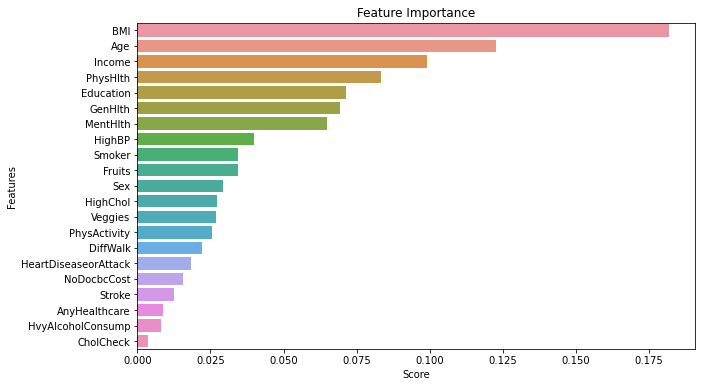

In [13]:
#可視化特徵
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [14]:
#視覺化
df.Diabetes_012[df['Diabetes_012'] == 0] = 'No Diabetes'
df.Diabetes_012[df['Diabetes_012'] == 1] = 'Pre-Diabetes'
df.Diabetes_012[df['Diabetes_012'] == 2] = 'Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Junior High School'
df.Education[df['Education'] == 4] = 'Senior High School'
df.Education[df['Education'] == 5] = 'Undergraduate Degree'
df.Education[df['Education'] == 6] = 'Magister'

df.Income[df['Income'] == 1] = 'Less Than $10,000'
df.Income[df['Income'] == 2] = 'Less Than $10,000'
df.Income[df['Income'] == 3] = 'Less Than $10,000'
df.Income[df['Income'] == 4] = 'Less Than $10,000'
df.Income[df['Income'] == 5] = 'Less Than $35,000'
df.Income[df['Income'] == 6] = 'Less Than $35,000'
df.Income[df['Income'] == 7] = 'Less Than $35,000'
df.Income[df['Income'] == 8] = '$75,000 or More'
df.head()

<ipython-input-14-83a0eab58dac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighBP[df['HighBP'] == 0] = 'No High'
<ipython-input-14-83a0eab58dac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
<ipython-input-14-83a0eab58dac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'
<ipython-input-14-83a0eab58dac>:12: Setting

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,Poor,18,15,Yes,Female,9,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Cholesterol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,7,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,Poor,30,30,Yes,Female,9,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Cholesterol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,Very Good,0,0,No,Female,11,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Cholesterol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,Very Good,3,0,No,Female,11,Undergraduate Degree,"Less Than $10,000"


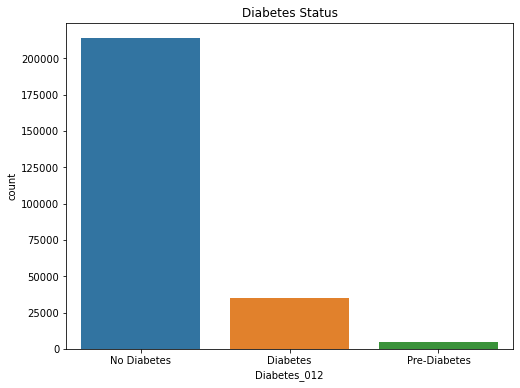

In [15]:
#糖尿病分布視覺化
plt.figure(figsize = (8,6))
sns.countplot(df['Diabetes_012'])
plt.title("Diabetes Status")
plt.show()

In [16]:
#糖尿病與血壓group
diabetes_bp=df.groupby(['Diabetes_012','HighBP']).size().reset_index(name='Count')
print(diabetes_bp)

   Diabetes_012   HighBP   Count
0      Diabetes  High BP   26604
1      Diabetes  No High    8742
2   No Diabetes  High BP   79312
3   No Diabetes  No High  134391
4  Pre-Diabetes  High BP    2913
5  Pre-Diabetes  No High    1718


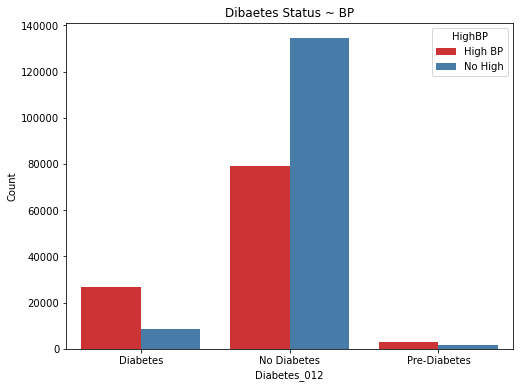

In [17]:
#糖尿病與血壓視覺化
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y = 'Count', hue = 'HighBP', data = diabetes_bp, palette = 'Set1')
plt.title("Dibaetes Status ~ BP")
plt.show()

In [18]:
#group diabetes status & cholesterol status
diabetes_chol = df.groupby(['Diabetes_012', 'HighChol']).size().reset_index(name = 'Count')
print(diabetes_chol)

   Diabetes_012             HighChol   Count
0      Diabetes     High Cholesterol   23686
1      Diabetes  No High Cholesterol   11660
2   No Diabetes     High Cholesterol   81030
3   No Diabetes  No High Cholesterol  132673
4  Pre-Diabetes     High Cholesterol    2875
5  Pre-Diabetes  No High Cholesterol    1756


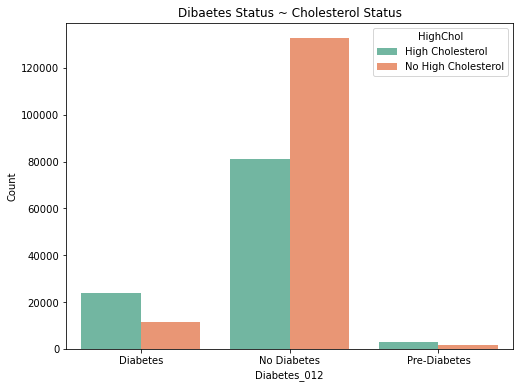

In [19]:
#視覺化糖尿病、膽固醇
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_012', y = 'Count', hue = 'HighChol', data = diabetes_chol, palette = 'Set2')
plt.title("Dibaetes Status ~ Cholesterol Status")
plt.show()

In [20]:
#group diabetes status & cholesterol check
diabetes_check = df.groupby(['Diabetes_012', 'CholCheck']).size().reset_index(name = 'Count')
print(diabetes_check)

   Diabetes_012                        CholCheck   Count
0      Diabetes     Cholesterol Check in 5 Years   35105
1      Diabetes  No Cholesterol Check in 5 Years     241
2   No Diabetes     Cholesterol Check in 5 Years  204536
3   No Diabetes  No Cholesterol Check in 5 Years    9167
4  Pre-Diabetes     Cholesterol Check in 5 Years    4569
5  Pre-Diabetes  No Cholesterol Check in 5 Years      62


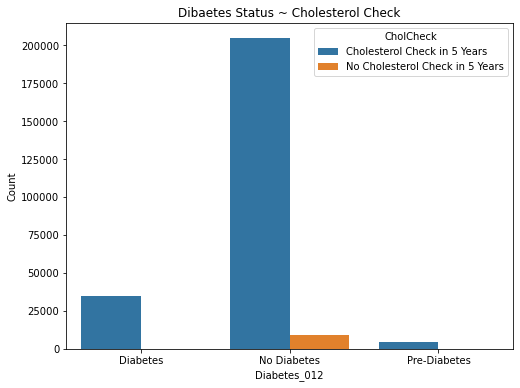

In [21]:
#visualize diabetes status ~ cholesterol check 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_012', y = 'Count', hue = 'CholCheck', data = diabetes_check)
plt.title("Dibaetes Status ~ Cholesterol Check")
plt.show()

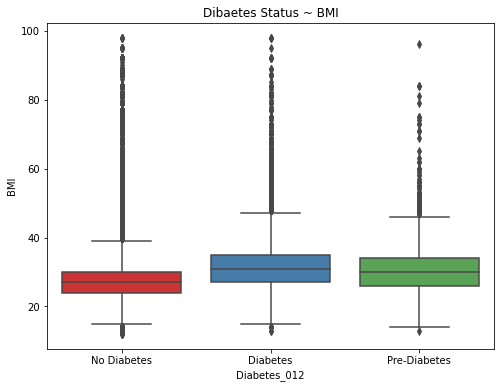

In [22]:
#visualize diabetes status ~ BMI
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Diabetes_012', y = 'BMI', palette = 'Set1')
plt.title("Dibaetes Status ~ BMI")
plt.show()

In [23]:
#group diabetes status & smoker status
diabetes_smoker = df.groupby(['Diabetes_012', 'Smoker']).size().reset_index(name = 'Count')
print(diabetes_smoker)

   Diabetes_012 Smoker   Count
0      Diabetes     No   17029
1      Diabetes    Yes   18317
2   No Diabetes     No  121879
3   No Diabetes    Yes   91824
4  Pre-Diabetes     No    2349
5  Pre-Diabetes    Yes    2282


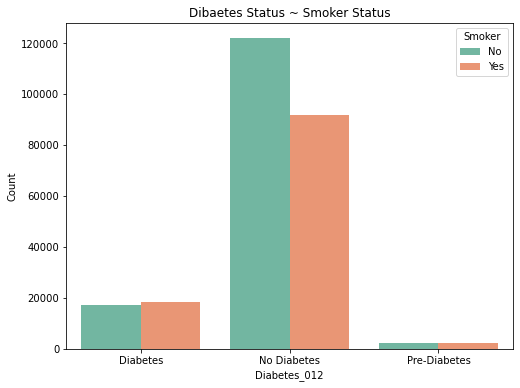

In [24]:
#visualize diabetes status ~ smoker status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_012', y = 'Count', hue = 'Smoker', data = diabetes_smoker, palette = 'Set2')
plt.title("Dibaetes Status ~ Smoker Status")
plt.show()

In [25]:
#group diabetes status & stroke status
diabetes_stroke = df.groupby(['Diabetes_012', 'Stroke']).size().reset_index(name = 'Count')
print(diabetes_stroke)

   Diabetes_012 Stroke   Count
0      Diabetes     No   32078
1      Diabetes    Yes    3268
2   No Diabetes     No  206944
3   No Diabetes    Yes    6759
4  Pre-Diabetes     No    4366
5  Pre-Diabetes    Yes     265


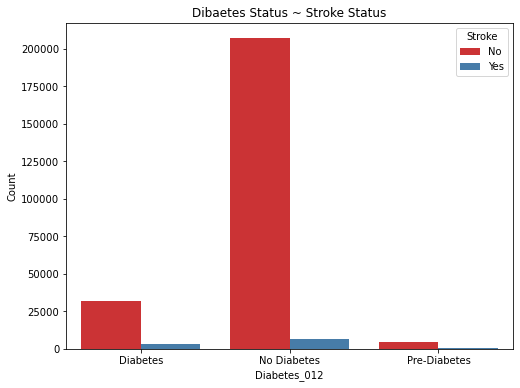

In [26]:
#visualize diabetes status ~ stroke status 
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes_012', y = 'Count', hue = 'Stroke', data = diabetes_stroke, palette = 'Set1')
plt.title("Dibaetes Status ~ Stroke Status")
plt.show()

In [27]:
#group diabetes status & heart diseaseor attack
diabetes_heart = df.groupby(['Diabetes_012', 'HeartDiseaseorAttack']).size().reset_index(name = 'Count')
print(diabetes_heart)

   Diabetes_012 HeartDiseaseorAttack   Count
0      Diabetes                   No   27468
1      Diabetes                  Yes    7878
2   No Diabetes                   No  198352
3   No Diabetes                  Yes   15351
4  Pre-Diabetes                   No    3967
5  Pre-Diabetes                  Yes     664
